## ほくでん 過去の電力使用状況データ

「過去の電力使用状況データのダウンロード」ページから取得したzipファイルを展開し、CSVファイルからデータを取り出して連結します。

http://denkiyoho.hepco.co.jp/area_download.html

### zipファイルを展開する

In [233]:
import zipfile
import os

# カレントディレクトリの下にディレクトリを用意する
zip_directory = '_zip'
csv_directory = '_csv'

path = os.path.join(os.getcwd(), zip_directory)

zip_file = os.path.join(path, "201807-09_hokkaido_denkiyohou.zip")

path = os.path.join(os.getcwd(), csv_directory)
if not os.path.exists(path):
    os.mkdir(path)

with zipfile.ZipFile(zip_file) as myzip:
    myzip.extractall(csv_directory)

### CSVファイルをリストにする

In [234]:
path = os.path.join(os.getcwd(), csv_directory)

csv_files = [os.path.join(path, filename) for filename in os.listdir(path)]

print(len(csv_files))

69


### CSVファイルを読み込んでDataFrameを連結する

In [235]:
import pandas as pd

data = [pd.read_csv(file, encoding='shift_jis', skiprows=7, nrows=24, usecols=[0,1,2,3,4]) for file in csv_files]

df = pd.concat(data)

df.columns = ['DATE', 'TIME', 'Power', 'Prediction', 'Ratio']

df.head()

,DATE,TIME,Power,Prediction,Ratio
0,2018/7/1,0:00,271.0,279,67.0
1,2018/7/1,1:00,273.0,279,67.0
2,2018/7/1,2:00,279.0,294,69.0
3,2018/7/1,3:00,288.0,299,71.0
4,2018/7/1,4:00,281.0,295,70.0


In [236]:
df.tail()

,DATE,TIME,Power,Prediction,Ratio
19,2018/9/7,19:00,0.0,0,0.0
20,2018/9/7,20:00,0.0,0,0.0
21,2018/9/7,21:00,0.0,0,0.0
22,2018/9/7,22:00,0.0,0,0.0
23,2018/9/7,23:00,0.0,0,0.0


### DataFrameをCSVファイルに書き出す

In [98]:
data_directory = 'data'

path = os.path.join(os.getcwd(), data_directory)
if not os.path.exists(path):
    os.mkdir(path)

csv_file = os.path.join(path, '201807-09_hokkaido_denki.csv')

df.to_csv(csv_file, encoding='shift_jis', index=False)

### indexをdatetimeに変換する

In [101]:
df['DateTime'] = pd.to_datetime(df['DATE'] +' ' +df['TIME'])
df.set_index('DateTime', inplace=True)

### 使用電力実績のプロット

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font='IPAexMincho') # フォントを指定する

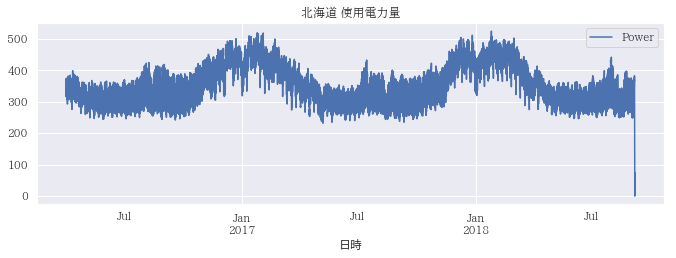

In [228]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
fig.subplots_adjust(bottom=0.25, left=0.08, right=0.95)

df.loc[:, ['Power']].plot(ax=ax, label="電力使用量")

plt.xlabel("日時", fontproperties=fp_ipag)
plt.title("北海道 使用電力量")

plt.legend()
plt.show()

fig.savefig("images/Hokkaido_Power_Usage.png")

In [170]:
# 日本語フォントの設定
from matplotlib.font_manager import FontProperties

# ローカルの環境に合わせてフォントを指定すること
fp_ipag = FontProperties(fname='c:\\windows\\fonts\\ipaexg.ttf', size=12) #IPAGothic

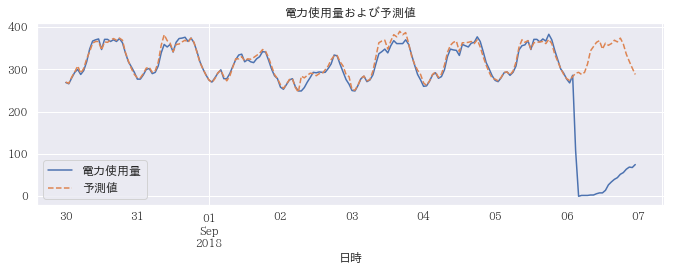

In [216]:
from datetime import datetime, timedelta

# 8月30日以降のデータをプロット
day = datetime(2018, 8, 30, 0, 0)

fig, ax = plt.subplots(1,1, figsize=(10,4))
fig.subplots_adjust(bottom=0.25, left=0.08, right=0.95)

df.loc[day:, 'Power'].plot(ax=ax, label='電力使用量')

df.loc[day:, 'Prediction'].plot(ls='--', label='予測値')

plt.xlabel("日時", fontproperties=fp_ipag)

plt.title("北海道 電力使用量および予測値", fontproperties=fp_ipag)

plt.legend(prop=fp_ipag)

plt.show()

fig.savefig("images/Hokkaido_Power_Usage_Prediction.png")

### dataフォルダのcsvファイルを読み込む

In [207]:
import pandas as pd

df = pd.concat( [pd.read_csv(os.path.join("data", file), encoding='shift_jis') for file in 
os.listdir("data")])

df['DateTime'] = pd.to_datetime(df['DATE'] +' ' +df['TIME'])
df.set_index('DateTime', inplace=True)

df.fillna(0, inplace=True)
df.tail()

,DATE,TIME,Power,Prediction,Ratio
DateTime,,,,,
2018-09-06 19:00:00,2018/9/6,19:00,56.0,360,12.0
2018-09-06 20:00:00,2018/9/6,20:00,64.0,336,14.0
2018-09-06 21:00:00,2018/9/6,21:00,69.0,319,15.0
2018-09-06 22:00:00,2018/9/6,22:00,68.0,303,15.0
2018-09-06 23:00:00,2018/9/6,23:00,75.0,288,17.0
